In [21]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
nadeje = pd.read_csv('nadeje.csv', sep=',', encoding='utf-8')
narozeni = pd.read_csv('narozeni.csv', sep=',', encoding='utf-8')
plodnost = pd.read_csv('plodnost.csv', sep=',', encoding='utf-8')

##zapnout rovnomernou distribuci dat / vytizenost a aby šlo se dostat z jakehokoli uzlu kamkoliv
##narozeni - https://data.gov.cz/datov%C3%A1-sada?iri=https%3A%2F%2Fdata.gov.cz%2Fzdroj%2Fdatov%C3%A9-sady%2F00025593%2F5948c8558e7dcc7b75e89fe13c26dcb0
##nadeje - https://data.gov.cz/datov%C3%A1-sada?iri=https%3A%2F%2Fdata.gov.cz%2Fzdroj%2Fdatov%C3%A9-sady%2F00025593%2Fbfe32ca003b860395f09b506d07ff665
##plodnost - https://data.gov.cz/datov%C3%A1-sada?iri=https%3A%2F%2Fdata.gov.cz%2Fzdroj%2Fdatov%C3%A9-sady%2F00025593%2Fb5094f4457e365b7540df88999d2ccb8

In [23]:
#Dropovaní nullových hodnot
nadeje = nadeje.dropna()
narozeni = narozeni.dropna()
plodnost = plodnost.dropna()

In [24]:
#Describe nadeje doziti
nadeje.describe(include='all')

,Ukazatel,IndicatorType,"ČR, regiony",Uz01A,Roky,CasR,Pohlaví,POHZM,Věk (roky),VEK1UT,Hodnota
count,43884,43884,43884,43884,43884.000000,43884.000000,43884,43884.000000,43884.000000,4.388400e+04,43884.000000
unique,1,1,9,9,NaN,NaN,2,NaN,NaN,NaN,NaN
top,Naděje dožití (ex),5411UT,Česko,CZ,NaN,NaN,ženy,NaN,NaN,NaN,NaN
freq,43884,43884,4876,4876,NaN,NaN,21942,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2012.000000,2012.000000,NaN,1.500000,52.500000,4.096758e+14,31.258511
std,NaN,NaN,NaN,NaN,6.633325,6.633325,NaN,0.500006,30.598551,3.885930e+12,24.311403
min,NaN,NaN,NaN,NaN,2001.000000,2001.000000,NaN,1.000000,0.000000,4.000006e+14,1.282733
25%,NaN,NaN,NaN,NaN,2006.000000,2006.000000,NaN,1.000000,26.000000,4.100266e+14,7.823007
50%,NaN,NaN,NaN,NaN,2012.000000,2012.000000,NaN,1.500000,52.500000,4.100531e+14,27.087884
75%,NaN,NaN,NaN,NaN,2018.000000,2018.000000,NaN,2.000000,79.000000,4.100796e+14,52.159219


In [25]:
#Describe narozeni
narozeni.describe(include='all')

,Ukazatel,IndicatorType,Roky,CasR,"ČR, Reg. soudržnosti, Kraje",Uz012,Hodnota
count,7728,7728,7728.000000,7728.000000,7728,7728,7728.000000
unique,14,14,NaN,NaN,23,23,NaN
top,Narození,4355,NaN,NaN,Česko,CZ,NaN
freq,552,552,NaN,NaN,336,336,NaN
mean,NaN,NaN,2011.500000,2011.500000,NaN,NaN,4381.727223
std,NaN,NaN,6.922634,6.922634,NaN,NaN,10616.565241
min,NaN,NaN,2000.000000,2000.000000,NaN,NaN,1.072804
25%,NaN,NaN,2005.750000,2005.750000,NaN,NaN,30.810030
50%,NaN,NaN,2011.500000,2011.500000,NaN,NaN,1491.000000
75%,NaN,NaN,2017.250000,2017.250000,NaN,NaN,5510.000000


In [26]:
#Describe plodnost
plodnost.describe(include='all')

,Ukazatel,IndicatorType,Roky,CasR,"ČR, Reg. soudržnosti, Kraje",Uz012,Věk (jednoleté skupiny),VEKZEN1PLOD,Hodnota
count,18515,18515.0,18515.000000,18515.000000,18515,18515,18515.000000,1.851500e+04,18515.000000
unique,1,NaN,NaN,NaN,23,23,NaN,NaN,NaN
top,Míry plodnosti,NaN,NaN,NaN,Česko,CZ,NaN,NaN,NaN
freq,18515,NaN,NaN,NaN,805,805,NaN,NaN,NaN
mean,NaN,5406.0,2012.000000,2012.000000,NaN,NaN,32.000000,4.100326e+14,42.206040
std,NaN,0.0,6.633429,6.633429,NaN,NaN,10.099778,1.009979e+10,41.198390
min,NaN,5406.0,2001.000000,2001.000000,NaN,NaN,15.000000,4.100156e+14,0.000000
25%,NaN,5406.0,2006.000000,2006.000000,NaN,NaN,23.000000,4.100236e+14,3.881731
50%,NaN,5406.0,2012.000000,2012.000000,NaN,NaN,32.000000,4.100326e+14,29.616725
75%,NaN,5406.0,2018.000000,2018.000000,NaN,NaN,41.000000,4.100416e+14,74.680895


In [27]:
#Pridani sloupce Uz01A do narozeni a plodnosti pro budoci shardovani
narozeni['Uz01A'] = narozeni['Uz012'].str[0:4]
plodnost['Uz01A'] = plodnost['Uz012'].str[0:4]

plodnost.to_csv('plodnost_upravena.csv', index=False)
narozeni.to_csv('narozeni_upravena.csv', index=False)

In [28]:
#kontrola Uz01A
nadejeUz01A = nadeje['Uz01A'].unique()
narozeniUz01A = narozeni['Uz01A'].unique()
plodnostUz01A = plodnost['Uz01A'].unique()
print(nadejeUz01A)
print(narozeniUz01A)  
print(plodnostUz01A)

print(set(nadejeUz01A) - set(narozeniUz01A))
print(set(nadejeUz01A) - set(plodnostUz01A))
       

['CZ' 'CZ01' 'CZ02' 'CZ03' 'CZ04' 'CZ05' 'CZ06' 'CZ07' 'CZ08']
['CZ' 'CZ01' 'CZ02' 'CZ03' 'CZ04' 'CZ05' 'CZ06' 'CZ07' 'CZ08']
['CZ' 'CZ01' 'CZ02' 'CZ03' 'CZ04' 'CZ05' 'CZ06' 'CZ07' 'CZ08']
set()
set()


In [29]:
nadejeUz01A = nadeje['Uz01A'].value_counts()
#print("Nadeje dozití: \n", nadejeUz01A)

narozeniUz01A = narozeni['Uz01A'].value_counts()
#print("Narození: \n", narozeniUz01A)

plodnostUz01A = plodnost['Uz01A'].value_counts()
#print("Plodnost: \n", plodnostUz01A)

celkem = pd.DataFrame()
celkem['Nadeje dožití'] = nadejeUz01A
celkem['Narození'] = narozeniUz01A
celkem['Plodnost'] = plodnostUz01A
celkem['Celkem'] = celkem.sum(axis=1)
print(celkem)

       Nadeje dožití  Narození  Plodnost  Celkem
Uz01A                                           
CZ              4876       336       805    6017
CZ01            4876       672      1610    7158
CZ02            4876       672      1610    7158
CZ03            4876      1008      2415    8299
CZ04            4876      1008      2415    8299
CZ05            4876      1344      3220    9440
CZ06            4876      1008      2415    8299
CZ07            4876      1008      2415    8299
CZ08            4876       672      1610    7158


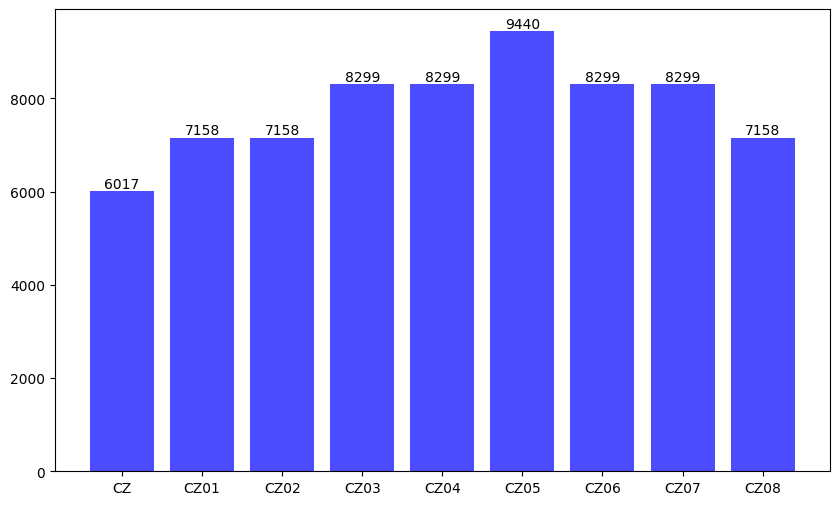

In [30]:
#Graf celkoveho poctu dat podle regionu
plt.figure(figsize=(10, 6))
bars = plt.bar(celkem.index, celkem['Celkem'], color='blue', alpha=0.7, label='Celkem')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.show()